In [1]:
# Imports required
import pickle
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# File Path and converting audio file to binary data
file = "Data Samples/blues61.wav"
y, sr = librosa.load(file, duration=3, offset=0)

In [3]:
# Function to plot graph of the audio file
def plot_sound(y, sr):
    plt.figure(figsize=(14, 5))
    print("length {}, sample-rate {}".format(y.shape, sr))
    librosa.display.waveshow(y, sr=sr)

length (66150,), sample-rate 22050


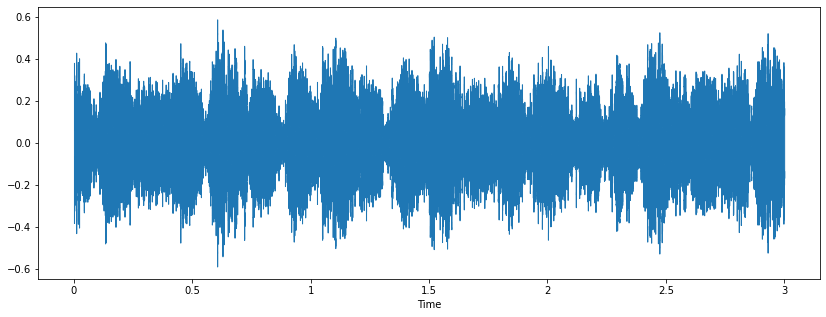

In [4]:
# Plot of sound Amplitude Graph
plot_sound(y, sr)

In [5]:
# Function to plot spectrogram of the audio file
def plot_spectrogram(y, sr):
    Y = librosa.stft(y)
    Ydb = librosa.amplitude_to_db(abs(Y))
    plt.figure(figsize=(14, 6))
    librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

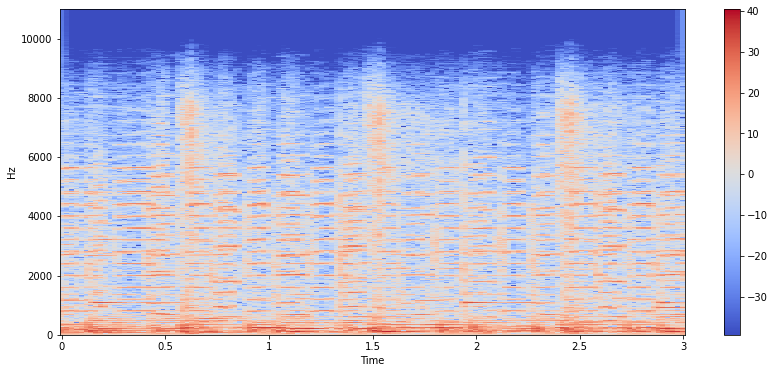

In [6]:
# Plot of Spectogram
plot_spectrogram(y, sr)

In [7]:
# Function to add features to the list and keep track of feature extraction
def addToList(arr, name, value):
    print(f"{name}: {value}")
    arr.append(value)

In [8]:
# Function to extract features
def extract_features(y, sr):
    arr = []
    
    # mfcc mean and variance values from 1 to 20
    for i in range(1, 21):
        mfcc = librosa.feature.mfcc(y=y, sr=sr)[i-1]
        addToList(arr, f"mfcc{i}_mean", np.mean(mfcc))                
        addToList(arr, f"mfcc{i}_var", np.var(mfcc))

    # chroma_stft mean and variance values
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    addToList(arr, "chroma_stft_mean", np.mean(chroma_stft))
    addToList(arr, "chroma_stft_var", np.var(chroma_stft))

    # rms mean and variance values
    rms = librosa.feature.rms(y=y)
    addToList(arr, "rms_mean", np.mean(rms))
    addToList(arr, "rms_var", np.var(rms))

    # spectral_centroid mean and variance values
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    addToList(arr, "spectral_centroid_mean", np.mean(spectral_centroid))
    addToList(arr, "spectral_centroid_var", np.var(spectral_centroid))

    # spectral_bandwidth mean and variance values
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    addToList(arr, "spectral_bandwidth_mean", np.mean(spectral_bandwidth))
    addToList(arr, "spectral_bandwidth_var", np.var(spectral_bandwidth))

    # spectral_rolloff mean and variance values
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    addToList(arr, "spectral_rolloff_mean", np.mean(spectral_rolloff))
    addToList(arr, "spectral_rolloff_var", np.var(spectral_rolloff))

    # zero_crossing_rate mean and variance values
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    addToList(arr, "zero_crossing_rate_mean", np.mean(zero_crossing_rate))
    addToList(arr, "zero_crossing_rate_var", np.var(zero_crossing_rate))

    # harmony mean and variance values
    harmony = librosa.effects.harmonic(y=y)
    addToList(arr, "harmony_mean", np.mean(harmony))
    addToList(arr, "harmony_var", np.var(harmony))

    # tempo mean and variance values
    tempo = librosa.beat.tempo(y=y, sr=sr)[0]
    addToList(arr, "tempo", tempo)

    return arr

In [9]:
# Extracting Features from the data
arr = extract_features(y, sr)

mfcc1_mean: -88.2271728515625
mfcc1_var: 777.76953125
mfcc2_mean: 95.11746215820312
mfcc2_var: 158.73887634277344
mfcc3_mean: -30.84507942199707
mfcc3_var: 165.46043395996094
mfcc4_mean: 73.26284790039062
mfcc4_var: 52.495147705078125
mfcc5_mean: -29.884239196777344
mfcc5_var: 49.147708892822266
mfcc6_mean: 38.71539306640625
mfcc6_var: 41.39167022705078
mfcc7_mean: -16.42662239074707
mfcc7_var: 66.81072998046875
mfcc8_mean: 23.698305130004883
mfcc8_var: 43.624610900878906
mfcc9_mean: -16.591188430786133
mfcc9_var: 47.320899963378906
mfcc10_mean: 7.876019477844238
mfcc10_var: 48.0809326171875
mfcc11_mean: -14.37150764465332
mfcc11_var: 50.39840316772461
mfcc12_mean: 11.041633605957031
mfcc12_var: 59.14166259765625
mfcc13_mean: -11.9007568359375
mfcc13_var: 47.21890640258789
mfcc14_mean: 3.231534004211426
mfcc14_var: 75.86065673828125
mfcc15_mean: -9.844144821166992
mfcc15_var: 48.4255256652832
mfcc16_mean: -0.7565591335296631
mfcc16_var: 40.436058044433594
mfcc17_mean: -3.75060653686523

In [10]:
# Loading the scaler saved during model training
with open('Scalers/minmax.pickle', 'rb') as handle:
    minmax = pickle.load(handle)

# Normalizing the features using the scaler
arr = minmax.transform([arr])

C:\Users\agraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [11]:
# Labels for prediction
label = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [12]:
# Prediction function
def get_genre(model, arr):
    preds = model.predict(arr)

    if (np.issubdtype(type(preds[0]), int)):
        return preds[0]
    else:
        return preds[0][0]

In [15]:
def final_pred(arr):
    weightLabels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

    # Model Accuracies
    acc = { "NaiveBayes" : 0.52219, 
            "StochasticGradientDescent" : 0.66567, 
            "KNN" : 0.81481, 
            "DecissionTrees" : 0.63197, 
            #"RandomForest" : 0.79813, 
            "SupportVectorMachine" : 0.74241, 
            "LogisticRegression" : 0.67968, 
            "NeuralNets" : 0.68569, 
            "CatBoostClassifier" : 0.89523, 
            "CrossGradientBooster" : 0.8969, 
            "CrossGradientBoosterRandomForest" : 0.72706 
                }

    for name in acc.keys():
        with open(f'Models/{name}.pickle', 'rb') as handle:
            model = pickle.load(handle)

        weightLabels[get_genre(model, arr)] += acc[name]

    
    mx = max(weightLabels)
    return label[weightLabels.index(mx)]


In [16]:
mx = final_pred(arr)

print(mx)

C:\Users\agraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\agraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\agraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\agraw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does

blues
